Many of the ideas in this tutorial are simplified versions of what is discussed in 

```
    Priebe, C. E., Park, Y., Vogelstein, J. T., Conroy, J. M., Lyzinski, V., Tang, M., ... & Bridgeford, E. (2019). On a two-truths phenomenon in spectral graph clustering. Proceedings of the National Academy of Sciences, 116(13), 5995-6000.
```

Create an affinity network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


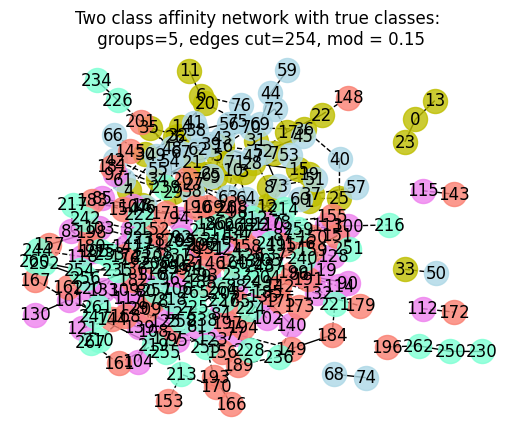

In [306]:
##############
### Cell 1 ###
##############

## REQUIRES pip install scikit-learn

import numpy as np
from Girvan_Newman_stochastic_block_network_v2 import AssortativeMixing
from drawing_utilities import show_dendrogram
from drawing_utilities import show_partitions
from drawing_utilities import show_kCores
from drawing_utilities import show_kCores_by_partition
from drawing_utilities import show_2D_scatterplot
from partitioning_utilities import get_k_fiedler_eigenvectors_sparse
from partitioning_utilities import get_k_leading_eigenvectors_sparse
from partitioning_utilities import get_colors_from_clusters
from numpy.typing import NDArray
import networkx as nx

%load_ext autoreload

a = 0.4
b = 0.02
c = 0.4
M: NDArray[np.float32] = np.array([[a, a, b, b, b],
                [a, a, b, b, b],
                [b, b, c, c, c],
                [b, b, c, c, c],
                [b, b, c, c, c]])
modular_network = AssortativeMixing(M=M, poisson_lambda=[3,3,3,3,3], num_edges=400)
G = modular_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class affinity network with true classes:\n")

Look at dendrogram

In [ ]:
##############
### Cell 2 ###
##############
import networkx as nx
from copy import deepcopy
def largest_component(graph):
    # Find all connected components
    H = deepcopy(graph)
    components = nx.connected_components(H)
    # Get the largest component
    largest = max(components, key=len)
    H = deepcopy(H.subgraph(largest))
    mapping = {old_label: new_label for new_label, old_label in enumerate(G.nodes())}
    H = nx.relabel_nodes(H, mapping)
    return H

H = largest_component(G)
show_dendrogram(H)

UnboundLocalError: cannot access local variable 'c1' where it is not associated with a value

<Figure size 640x480 with 0 Axes>

Look at kcores

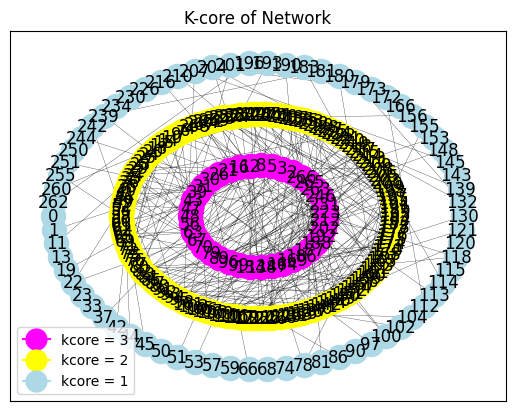

In [308]:
show_kCores(G)

Get first and second fiedler vector

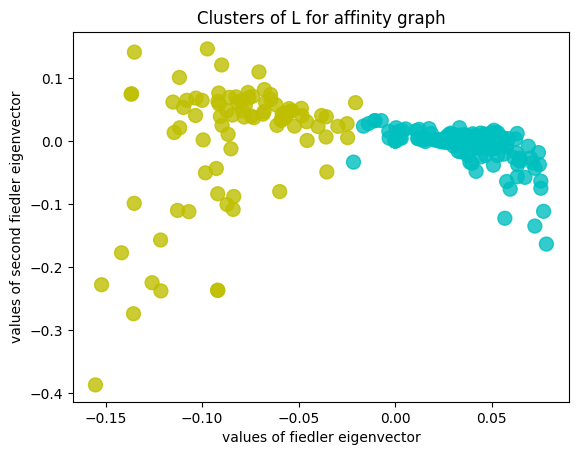

In [ ]:
##############
### Cell 3 ###
##############

%autoreload 2

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for affinity graph")


Show graph partitioned into two clusters using the Laplacian embedding

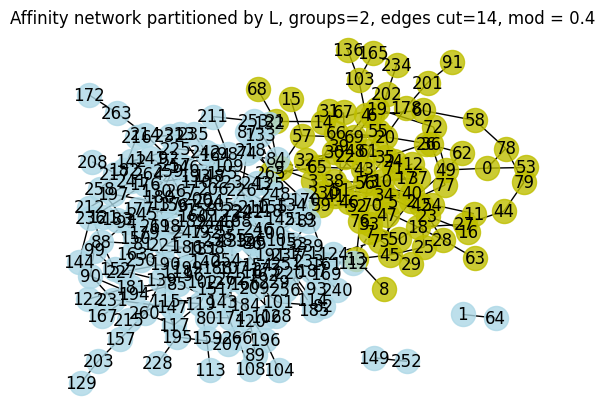

In [ ]:
##############
### Cell 4 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by L")

Repeat but partition using adjacency matrix

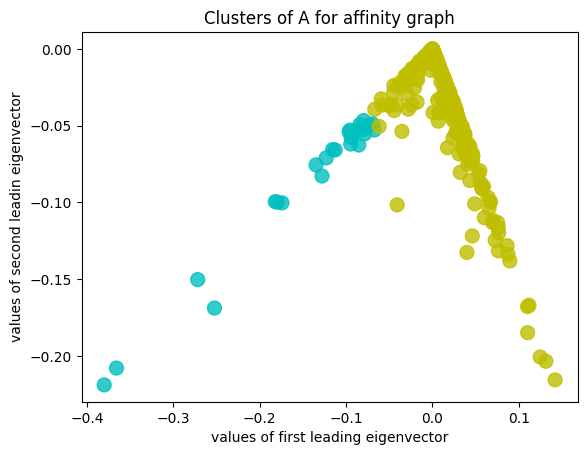

In [ ]:
##############
### Cell 5 ###
##############
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=2)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for affinity graph")


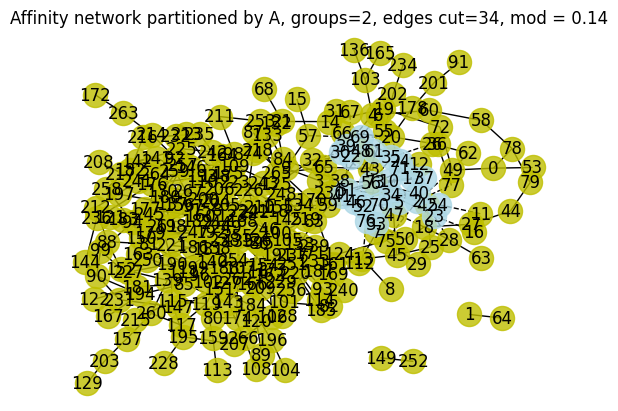

In [ ]:
##############
### Cell 6 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by A")

Redraw to see which node classes belong n core and which belong in the periphery

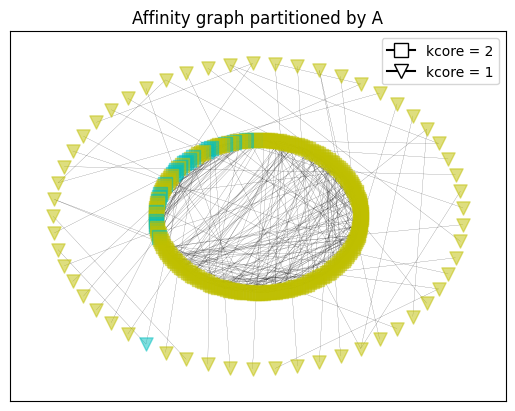

In [ ]:
##############
### Cell 7 ###
##############

show_kCores_by_partition(G, colors, title="Affinity graph partitioned by A")

---

Create a core-periphery network

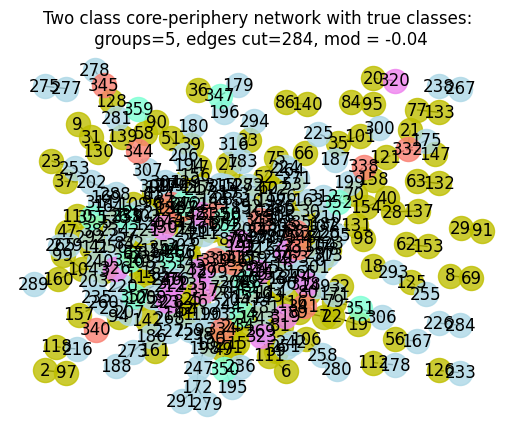

In [ ]:
##############
### Cell 8 ###
##############

a = 0.4
b = 0.1
c = 0.001
M: NDArray[np.float32] = np.array([[a, a, b, b, b],
                [a, a, b, b, b],
                [b, b, c, c, c],
                [b, b, c, c, c],
                [b, b, c, c, c]])
core_periphery_network = AssortativeMixing(M=M, poisson_lambda=[2,2,4,4,4], num_edges=400)
G = core_periphery_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class core-periphery network with true classes:\n")



Look at dendrogram

In [ ]:
##############
### Cell 9 ###
##############

G = largest_component(G)
show_dendrogram(G,title="Dendrogram of core-periphery network")

ValueError: No index in cluster dictionary found

<Figure size 640x480 with 0 Axes>

Look at kcores

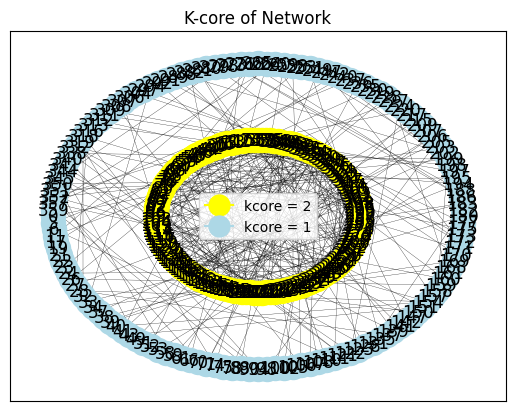

In [ ]:
###############
### Cell 10 ###
###############

show_kCores(G)

Let's partition using the normalized Laplacian matrix

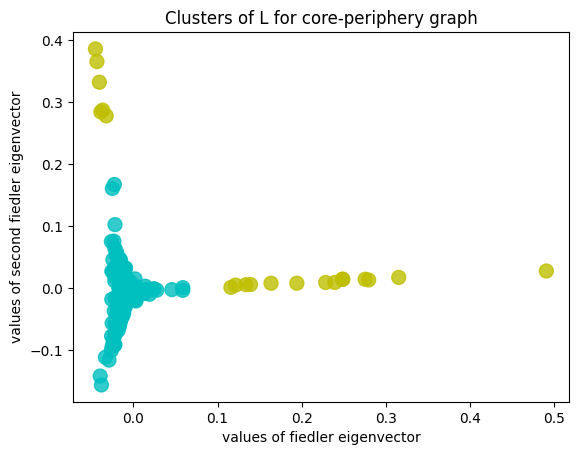

In [ ]:
###############
### Cell 11 ###
###############

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for core-periphery graph")

Show partition

In [ ]:
###############
### Cell 12 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by L:\n")

IndexError: list index out of range

IndexError: list index out of range

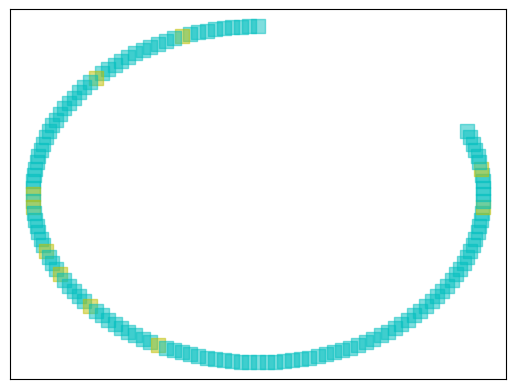

In [ ]:
show_kCores_by_partition(G,colors,title = "Core-periphery network partitioned by L")

Repeat using the adjacency matrix

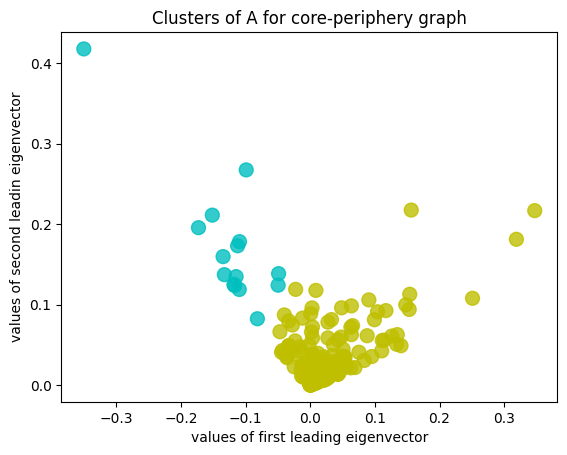

In [ ]:
###############
### Cell 13 ##
###############

A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=2)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for core-periphery graph")

Show partition by adjacency matrix

In [ ]:
###############
### Cell 14 ###
###############

group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by A:\n")

IndexError: list index out of range

Redraw using the shell layout to see which class falls in core and which in periphery

IndexError: list index out of range

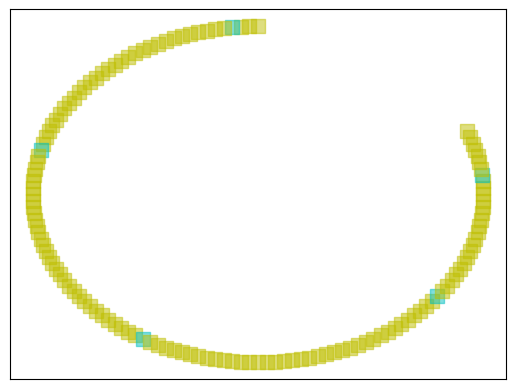

In [ ]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")

It looks like most of the yellow nodes are in the 3-core, which means that the clustering by the eigenvectors of the adjacency matrix pull out at least some information about the k-core structure.

---

### Clustering Using More Information

In [ ]:
from sklearn.manifold import TSNE
num_eigenvectors: int = 5
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, num_eigenvectors)
tsne: TSNE = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(leading_vectors)
colors = get_colors_from_clusters(tsne_components, num_clusters=3)


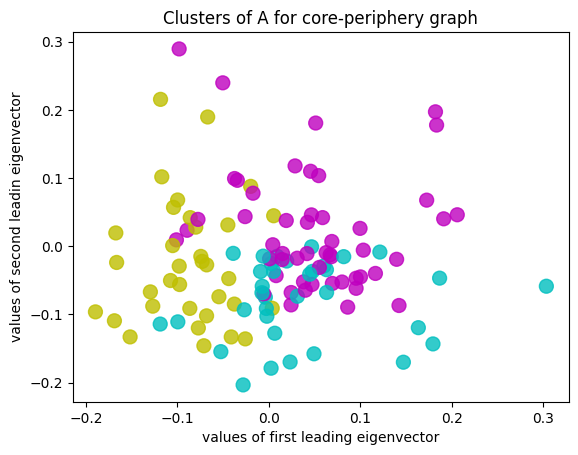

In [ ]:
show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for core-periphery graph")

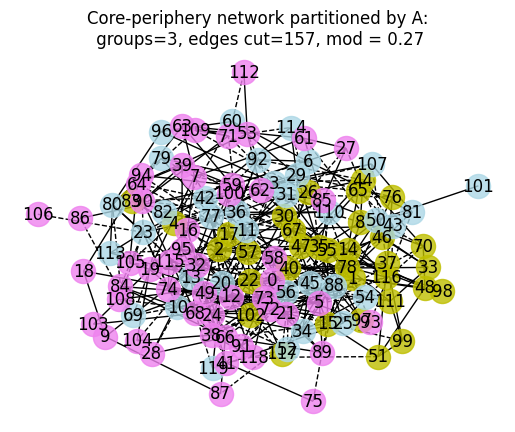

In [ ]:
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}


show_partitions(G, 
                partition=(group1, group2, group3), 
                title="Core-periphery network partitioned by A:\n")

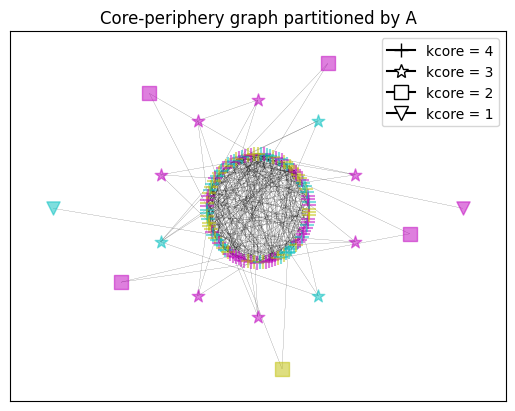

In [ ]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")

I see nothing useful in this plot